# Introduction to Binary Classification

* Some material from [peterroelants](https://github.com/peterroelants/peterroelants.github.io)

In [1]:
# do all of the imports here
import numpy  # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
from sklearn import datasets
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import math
from __future__ import division
numpy.random.seed(seed=1)

ModuleNotFoundError: No module named 'seaborn'

Suppose you are to write some kind of function. You know what inputs it's going to take ($x$) and what kinds of outputs that are expected ($y$):

## $$y=f(x)$$

You find out, however, that your inputs are very complicated data points and your task is to write a function that can classify those data points into one of several classes. What do you do?

* Option 1: You can write $f(x)$, i.e., a rule-based algorithm, like we always have. Programmers do this all the time. 
* Option 2: You can write a different kind of $f(x)$ that learns the function on its own using data. 
  * **x = data** (i.e., input features)
  * **y = class label** (i.e., output)

#### What do we mean when we say that a machine learns?

Let's start with an intuitive example: linear regression. 

#### first, we need some data (i.e., `x` and `y`)

In [2]:
x = numpy.random.uniform(0, 1, 20)
def f(x): 
    return x * 2
noise_variance = 0.2  # Variance of the gaussian noise
noise = numpy.random.randn(x.shape[0]) * noise_variance
t = f(x) + noise

In [4]:
t

array([ 0.82548023,  0.15873652,  1.9967651 ,  1.32970495,  0.12892626,
        0.57285553,  1.39201327,  1.7594464 , -0.20228468,  0.39280883,
        1.19614333,  0.105799  ,  0.67428317,  0.06345321,  0.33650739,
        1.72724165,  0.98724834,  1.17840179,  0.20253698,  0.26016254])

#### plot the data

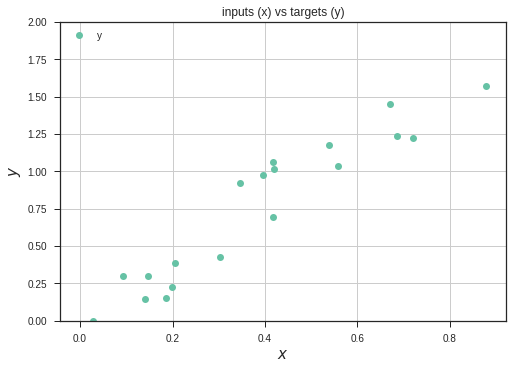

In [123]:
plt.plot(x, t, 'o', label='y')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.show()

#### now you want to use the data to make predictions

That is, given a novel $x$ that isn't already there, what would you predict $y$ to be? We need to model that somehow. 

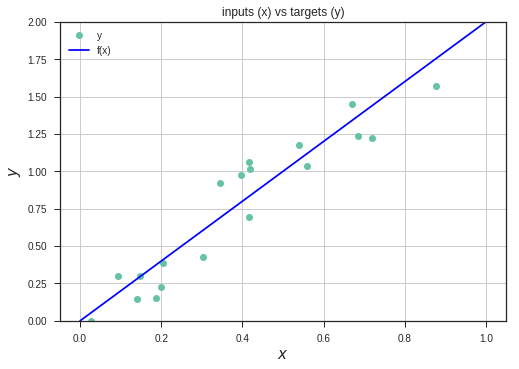

In [124]:
plt.plot(x, t, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.show()

#### That's called a linear regression line. How did we come up with that?

First, we need to define what a line is:

### $$y = mx + b$$

That means we need to find out what $m$ and $b$ are, using the data $x$ and the labels $y$. 

####  Cost functions:

To find the proper values of $m$ and $b$ using the data, we need to define a way to determine how well some arbitrary values of $m$ and $b$ represent / fit the data. This is what a cost function is for. In this case, we can calculate the vertical distance (aka the residual) between all of the data points and the line and sum up those distances. (This is well known for linear regression; the cost function is the least squares, or the sum of the squared residuals.)

The goal is to find a line represented by the values $m$ and $b$ such that the sum of the vertical distances is minimized. 

In [125]:
def nn(x, w): return x * w

# Define the cost function
def cost(y, t): return ((t - y)**2).sum()

Randomly choose some values for $m$ and $b$ then check against the cost function.

#### The battle is only part way over: we have to apply our cost function to different values of $m$ and $b$ and find the best line for the data.

The cost function tells us which way we should adjust $m$ and $b$. If we range over all possible values for $m$ and $b$, we can plot the cost.

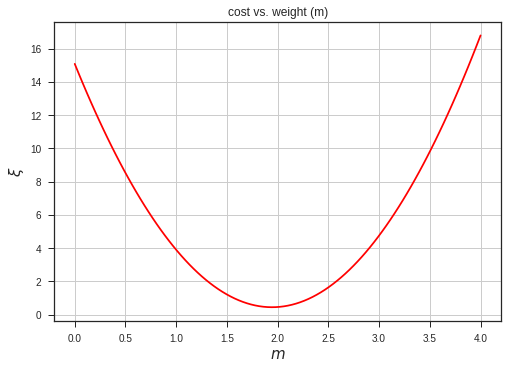

In [126]:
# Plot the cost vs the given weight w (m, in our explanation)

# Define a vector of weights for which we want to plot the cost
ws = numpy.linspace(0, 4, num=100)  # weight values
cost_ws = numpy.vectorize(lambda w: cost(nn(x, w) , t))(ws)  # cost for each weight in ws

# Plot
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$m$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('cost vs. weight (m)')
plt.grid()
plt.show()

Range over all possible values of $m$ and calculate the cost (ignore $b$ for the moment). Notice above that if we plot the cost for a bunch of $m$ values, we can find a value where the cost is at its lowest. 

#### How do we get to the minimal point?

That lowest point is the best "fit" line for the data. 

How do we find that line?

* Option 1: range over all possible values (very, very time consuming)
* Option 2: range until we reach a minimum (okay, but still time consuming, and how do we know which way to go with $m$, higher or lower?)
* Option 3: gradient descent

Gradient descent. The **gradient** is a functional way of representing the increase or decrease in the magnitude of something. Applied to our cost function, the gradient descent algorithm begins with some random initial point, computes the cost function, then computes a gradient step by determining the slope of where the initial point is, then goes in the desired direction; in our case, down towards a minimum.

In [127]:
# define the gradient function. Remember that y = nn(x, w) = x * w
def gradient(w, x, t): 
    return 2 * x * (nn(x, w) - t)

# define the update function delta w
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

# Set the initial weight parameter
w = 0.1
# Set the learning rate
learning_rate = 0.1

# Start performing the gradient descent updates, and print the weights and cost:
nb_of_iterations = 4  # number of gradient descent updates
w_cost = [(w, cost(nn(x, w), t))] # List to store the weight,costs values
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # Get the delta w update
    w = w - dw  # Update the current weight parameter
    w_cost.append((w, cost(nn(x, w), t)))  # Add weight,cost to list

# Print the final w, and cost
for i in range(0, len(w_cost)):
    print('m({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))

m(0): 0.1000 	 cost: 13.6197
m(1): 1.5277 	 cost: 1.1239
m(2): 1.8505 	 cost: 0.4853
m(3): 1.9234 	 cost: 0.4527
m(4): 1.9399 	 cost: 0.4510


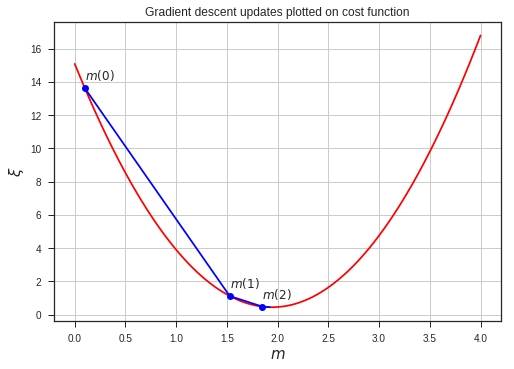

In [128]:
# Plot the first 2 gradient descent updates
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
# Plot the updates
for i in range(0, len(w_cost)-2):
    w1, c1 = w_cost[i]
    w2, c2 = w_cost[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$m({})$'.format(i)) 
# Show figure
plt.xlabel('$m$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.grid()
plt.show()

This is the intuition for a lot of classification approaches in machine learning: define a cost function then use data and a gradient to determine a best fit of the model (in the linear regression case, the weight $m$ and the bias term $b$ constitute the model). Machine "learning" often amounts to minimizing a cost function like this. 

A linear regression line doesn't really help us do classification, however. For classification, we usually have two different sets of data. We can plot the data like we did before, but instead of drawing a regression line to fit the data, we want to draw a decision boundary between different classes in the data. 


### Example: Iris Dataset

In [40]:
data = datasets.load_iris()
X = data.data[:150, :3]
y = data.target[:150]
X_full = data.data[:150, :]

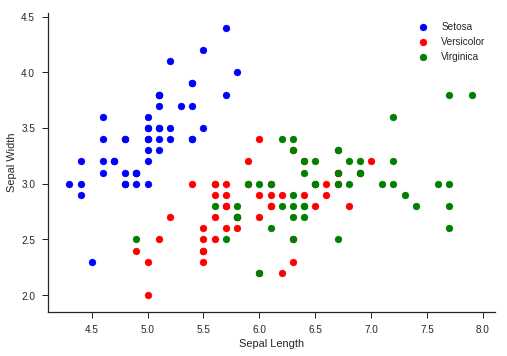

In [41]:
setosa = plt.scatter(X[:50,0], X[:50,1], c='b')
versicolor = plt.scatter(X[50:100,0], X[50:100,1], c='r')
virginica = plt.scatter(X[100:150,0], X[100:150,1], c='g')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor, virginica), ("Setosa", "Versicolor", "Virginica"))
sns.despine()

It's obvious where the decision boundary should go to separate Setosa from the others, but it's harded to separate Versicolor and Virginica from each other. If you were to write a function yourself, how would you do it? That would be quite challenging. 

Let's use the intuition from linear regression to find a way to draw a decision boundary. Obviously, we want to draw some kind of line. It would be better if, instead of just drawing a line, we had some way of saying that a sample fits a certain class in a certain number scale. A very useful scale is probability space: between 0 and 1. That is, can we use the intuitions of linear regression to determine if a sample $s$ belongs to class $c$ with some probability? I.e., $P(C=c|S=s)$. There's already a classifier that can do this for us: logistic regression.



### Logistic Regression

Logistic regression uses the intuitions of linear regression, where we want to fit a line to some data using a cost function and gradient descent, with the added benefit of being able to return a probabiliy. 

Instead of fitting line to data, we fit the **logistic function** to the data. Instead of just plotting data points as usual, imagine putting data points from some class $c_1$ along the 1 line and data points from a different class $c_2$ along the 0 line. 

#### Here's the logistic function

* Instead of $y = mx + b$, we use this.
* The weights determine where it shifts and how stretched it is. 

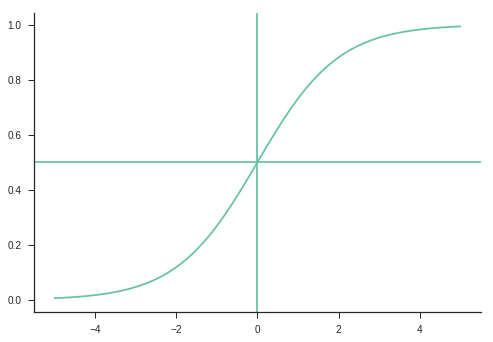

In [129]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + math.e**(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.axhline(.5)
plt.axvline(0)
sns.despine()

In [43]:
def logistic_func(theta, x):
    return float(1) / (1 + math.e**(-x.dot(theta))) 

If we want to follow the intuitions of linear regression, we need to initialize some values (i.e., the weights / coefficients), then use gradient descent to minimize the cost function. 

In [130]:
def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc

In [131]:
def cost_func(theta, x, y):
    '''
    computes the cost function; i.e., (for linear regression) minimize the distance between a regression line
    and all of the points
    '''
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)

def grad_desc(theta_values, X, y, lr=.001, converge_change=.001):
    '''
    the hard part of learning: gradient descent. Fortunately, the logistic function is convex --
    the derivitive is itself
    '''
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) #normalize
    #setup cost iter
    cost_iter = []
    cost = cost_func(theta_values, X, y)
    cost_iter.append([0, cost])
    change_cost = 1 # initialize the change in cost to a high value
    i = 1
    # this actually performs the gradient descent by moving the regression line until the cost change is very small
    while(change_cost > converge_change):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y)) # the cost change
        cost = cost_func(theta_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost #calculate the change in the cost
        i+=1
    return theta_values, np.array(cost_iter)

#### Now we use our data, applied to the logistic, cost, and gradient descent functions, to learn the weights for the classifier (also knowin as *training*)

In [46]:
shape = X.shape[1]
y_flip = np.logical_not(y.reshape(y.shape[0],1)) #flip Setosa to be 1 and Versicolor to zero to be consistent
betas = np.zeros(shape) #start off with zeros for the coefficients
fitted_values, cost_iter = grad_desc(betas, X, y_flip,  lr=.1)
fitted_values

array([-3.91547066,  5.42219164, -6.72251116])

#### How well did our cost function work?

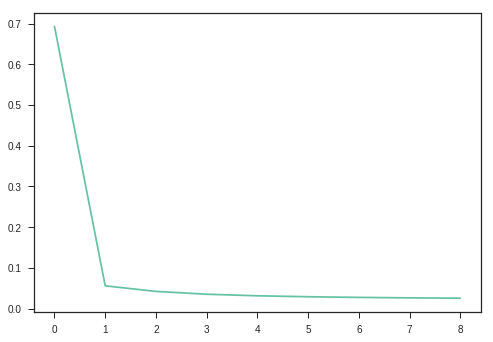

In [47]:
cost_X, cost_y = zip(*cost_iter)
plt.plot(cost_X, cost_y)

#### How well does our classifier perform on the data?

In [48]:
def pred_values(theta, X, hard=True):
    '''
    predictor values
    '''
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) #normalize
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0) # note the threshold of 0.5
    if hard:
        return pred_value
    return pred_prob

predicted_y = pred_values(fitted_values, X)
np.sum(y_flip == predicted_y) / 150.0

83.0

Logistic regression is a very common classifier for machine learning, but it has some limitations. It's a kind of **linear** classifier because it learns a linear decision boundary between two classes. 

What if the problem we are trying to solve isn't linearly separable? One simple example is the XOR problem. 

## Learning XOR

XOR, "exclusive or" means we have two bits. When both bits are on/off, it evaluates to zero. When one of the bits are on, then it evaluates to one.


| bit 1  | bit 2 | result |
| ---| ---| ---|
| 0  | 0  | 0  |
| 0  | 1  | 1  |
| 1  | 0  | 1  |
| 1  | 1  | 0  |

The claim: linear models such as logistic regression cannot learn the xor problem because it's not directly linear separable, but, with enough training data, a 2-layer neural network can. We'll just see about that. 

In [169]:
import pandas as pd
import numpy as np
import random

let's generate some XOR training data

In [182]:
m = 10100
X = []
y = []
for i in range(0,m):
    y_i = random.randint(0, 1) # randomly choose a label
    y.append(y_i)
    if y_i == 1: # when y is 1, then pick an input where one of the two bits are on
        X.append(random.choice([[1,0],[0,1]]))
    else: # otherwise turn both bits on or off
        X.append(random.choice([[0,0],[1,1]]))
    
X[:3], y[:3]

([[1, 0], [0, 1], [0, 1]], [1, 1, 1])

split the test and train data (not that it matters)

In [183]:
Xtrain, Xtest = np.array(X[:-100]), np.array(X[m-100:])
ytrain, ytest = np.array(y[:-100]), np.array(y[m-100:])

Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((10000, 2), (10000,), (100, 2), (100,))

### Try Logistic Regression, a linear clasifier

* we'll use scikit-learn's logistic regression classifier

In [184]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score


model = linear_model.LogisticRegression()
model.fit(Xtrain, ytrain)
accuracy_score(model.predict(Xtest), ytest)

0.49

#### What happened? It should have learned the function. 

The problem: XOR is not linearly separable. Where would a linear classifier like logistic regression draw a line to separate the two classes? It can't. 

(Image from Goodfellow et al's, Deep Learning book)